## Week 10 Instructor-Led Lab: Data Reduction
Author: Aerionna Skrutvold  
Course: BGEN632 Grad. Intro to Python  

The purpose for this assignment is to practice implementing data reduction techniques in Python. The program primarily makes use of the CaliforniaHospitalData.txt file contained within the data folder.

## Import Modules 

In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install factor-analyzer

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

## Set Working Directory 

In [7]:
os.chdir("C:/Users/gcassist/Desktop/MSBA/Spring 25/Python/week10labs/data")  

## Access Data 

In [8]:
CA_Personnel = pd.read_csv("calihospital.txt", sep="\t", engine="python", header=0) #open California Hospital data 

In [16]:
CA_Personnel.select_dtypes(include='number')

,HospitalID,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds,Work_ID,PositionID,Compensation,MaxTerm
0,45740,327.0,1.355202e+05,2.052343e+07,3.491622e+07,49933713,-5505933,15,721586,4,23987,2
1,12145,345.0,1.361567e+05,3.344754e+07,2.034860e+07,53351748,-444391,99,756481,1,46978,4
2,25667,601.2,1.970943e+05,3.725418e+07,3.783245e+07,72933707,-2152920,107,926378,1,46978,4
3,46996,400.0,1.391704e+05,2.338557e+07,2.466136e+07,51087341,3040415,55,856720,4,23987,2
4,37393,262.0,1.167978e+05,1.368450e+07,1.515999e+07,42845642,14001153,42,909709,1,46978,4
...,...,...,...,...,...,...,...,...,...,...,...,...
56,32930,2814.0,1.321032e+06,3.791029e+08,1.064302e+08,491523782,5990693,530,411280,1,46978,4
57,31032,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,439084836,38508125,462,310431,4,23987,2
58,22460,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,1650391999,59273999,445,380668,4,23987,2
59,33192,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,1074256998,144445998,730,308150,1,46978,4


In [24]:
# load employee ratings dataset and subset variables of interest in new df
ratings_df = pd.read_table('calihospital.txt')
ratings_df_pca = ratings_df[['HospitalID', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 
                             'OperInc', 'AvlBeds']]
# scale data using standardization
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(ratings_df_pca)

## Perform PCA 

In [43]:
# keep only desired columns - note: hospital ID is technically numerical (int64) but it is actually a categorical grouping variable in nature
pca_data = (CA_Personnel
            .filter([
                'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds'
            ]))

# inspect top 5 and bottom 5 rows
pca_data

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,327.0,1.355202e+05,2.052343e+07,3.491622e+07,49933713,-5505933,15
1,345.0,1.361567e+05,3.344754e+07,2.034860e+07,53351748,-444391,99
2,601.2,1.970943e+05,3.725418e+07,3.783245e+07,72933707,-2152920,107
3,400.0,1.391704e+05,2.338557e+07,2.466136e+07,51087341,3040415,55
4,262.0,1.167978e+05,1.368450e+07,1.515999e+07,42845642,14001153,42
...,...,...,...,...,...,...,...
56,2814.0,1.321032e+06,3.791029e+08,1.064302e+08,491523782,5990693,530
57,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,439084836,38508125,462
58,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,1650391999,59273999,445
59,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,1074256998,144445998,730


In [44]:
# inspect summary statistics
pca_data.describe()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
count,61.000000,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,61.000000
mean,1350.264262,6.695836e+05,1.662706e+08,9.015808e+07,2.562733e+08,-1.553491e+05,194.524590
std,2025.285385,1.097513e+06,2.827876e+08,1.372897e+08,4.249851e+08,7.154457e+07,221.832941
min,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000
25%,215.500000,6.579243e+04,1.368450e+07,1.426128e+07,2.416452e+07,-1.108177e+06,42.000000
50%,374.320000,1.723989e+05,3.184268e+07,3.491622e+07,6.339822e+07,1.572695e+06,99.000000
75%,1216.000000,5.409751e+05,1.737450e+08,9.306671e+07,1.998738e+08,6.198330e+06,234.000000
max,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000


## Screen Plot 

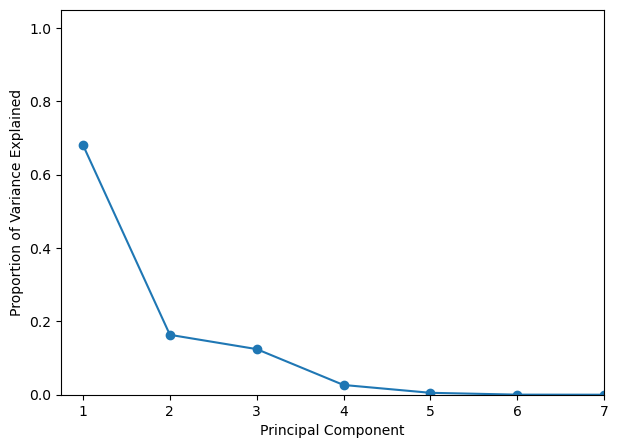

In [25]:
pca_result = pca(n_components=7).fit(scaled_data)

# generate scree plot - focus on the output
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()

In the scree plot above, you can see that the first 3 components are not flat. Starting with Component 4 you can see the plot is level and flat. This suggests that out of 7 variables, only 3 should be used for the analysis. 

## Eigenvalues

In [30]:
# obtain eigenvalues - focus on the output
pca_result.explained_variance_

array([4.84102624e+00, 1.16255152e+00, 8.85105259e-01, 1.89237722e-01,
       3.72263376e-02, 1.51958675e-03, 7.13245478e-22])

Based on the eigenvalues, we should keep the first 2 variables, as they are larger than 1.0 which is the way PCA is assessed. 

## Clustering in Python

In [45]:
# inspect first ten rows for columns with object datatypes
CA_Personnel.select_dtypes(include=['object']).head(10)

,Name,Zip,Website,TypeControl,Teaching,DonorType,LastName,FirstName,Gender,PositionTitle,StartDate
0,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,Web,David,M,Safety Inspection Member,1/1/2012
1,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,Rodriguez,Jose,M,Regional Representative,1/1/2009
2,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,Adamson,David,M,Regional Representative,1/1/2012
3,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,Roberts,Melissa,F,Safety Inspection Member,1/1/2009
4,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,Iwata,Akira,M,Regional Representative,1/1/2011
5,St. Elizabeth Community Hospital,96080,redbluff.mercy.org/index.htm,Non Profit,Small/Rural,Charity,Marlin,Bill,M,Safety Inspection Member,1/1/2011
6,Ukiah Valley Medical Center,95482,www.uvmc.org,Non Profit,Small/Rural,Charity,Johanson,Sandy,F,Regional Representative,1/1/2012
7,Mountains Community Hospital,92352,www.mchcares.com,District,Small/Rural,Charity,Web,David,M,State Board Representative,1/1/2011
8,Colusa Regional Medical Center,95932-2954,www.colusamedicalcenter.org,Non Profit,Small/Rural,Charity,Tanner,Patricia,F,Acting Director,1/1/2009
9,St. Mary Medical Center,92307-2206,www.stmary4health.com,Non Profit,Small/Rural,Charity,Milgrom,Patricia,F,Safety Inspection Member,1/1/2011


In [46]:
# subset numerical variables and categorical variables
clust_data = (CA_Personnel
              .filter([
                  'NoFTE','NetPatRev','InOperExp','OutOperExp','OperRev','OperInc','AvlBeds',
                  'Teaching', 'TypeControl', 'DonorType'
              ]))

In [47]:
# inspect unique values for categorical variables
print(CA_Personnel['Teaching'].unique())
print(CA_Personnel['TypeControl'].unique())
print(CA_Personnel['DonorType'].unique())

['Small/Rural' 'Teaching']
['District' 'Non Profit' 'Investor' 'City/County']
['Charity' 'Alumni']


In [48]:
le = preprocessing.LabelEncoder()

In [49]:
km = cls.KMeans(n_clusters=2).fit(pca_data)
km.labels_

clust_data['Teaching'] = le.fit_transform(clust_data['Teaching'])

cm1 = metcs.confusion_matrix(clust_data.Teaching, km.labels_)
print(cm1)

[[ 0 44]
 [ 8  9]]


C:\Users\gcassist\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
clust_data.TypeControl.unique()

km2 = cls.KMeans(n_clusters=4).fit(pca_data)
km2.labels_

clust_data['TypeControl'] = le.fit_transform(clust_data['TypeControl'])

cm2 = metcs.confusion_matrix(clust_data.TypeControl, km2.labels_)
print(cm2)

[[ 2  1  4  0]
 [14  0  0  0]
 [ 3  0  0  0]
 [27  3  4  3]]


C:\Users\gcassist\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [51]:
clust_data.DonorType.unique()

km3 = cls.KMeans(n_clusters=2).fit(pca_data)
km3.labels_

clust_data['DonorType'] = le.fit_transform(clust_data['DonorType'])

cm3 = metcs.confusion_matrix(clust_data.DonorType, km2.labels_)
print(cm3)

[[ 2  4  8  3]
 [44  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


C:\Users\gcassist\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
print("Teaching\n", cm1)
print("TypeControl\n",cm2)
print("DonorType\n",cm3)

Teaching
 [[ 0 44]
 [ 8  9]]
TypeControl
 [[ 2  1  4  0]
 [14  0  0  0]
 [ 3  0  0  0]
 [27  3  4  3]]
DonorType
 [[ 2  4  8  3]
 [44  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


The first model appears to behave the cleanest. While it is possible one of the numeric variables may perform better, we would need to convert them into categorical variables. For the sake of brevity in this assignment, we will forgoe that option and rely on the naturally occurring categorical variables.

The last step is to create a confusion matrix that looks decent.

## Confusion Matrix 

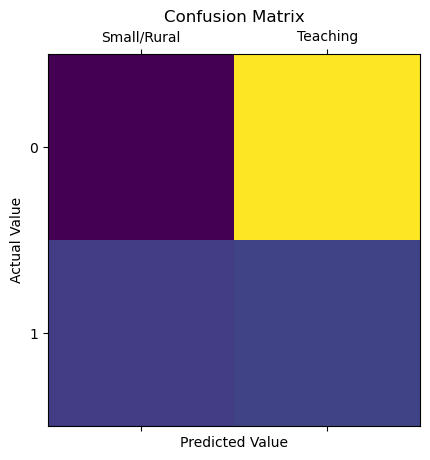

In [53]:
# color-based chart
plt.matshow(cm1)
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.xticks([0,1], ['Small/Rural','Teaching'])

plt.show()

## References

#### I honestly had given up on the second half of this module. Thank you for sending the instructor lab walkthrough. I used that for the coding on Clustering and Confusion. 
I used ChatGPT to help me understand the concepts but don't feel like I could complete the second half of assignment without asking ChatGPT to provide me code. I ended up using your code from the instructor lab walkthrough on the second half of the assignment.    
>>> https://chatgpt.com/share/681a44fd-cf9c-8012-8ed0-68930e89a469